# Keras Hello World
最近开始学习Keras，个人觉得最有效的学习方法就是写很多很多代码，熟能成巧。我们先从最简单的例子来学习Keras，Keras版的Hello World。
在这个例子中，我们的任务是进行花朵的分类。
+ 本文的代码来自 [这里](https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb)，作者将Keras与sklearn进行了比较，有详细代码的解释。本文只做Keras部分的内容，删去了原本sklearn的内容
+ 本文为个人的代码记录，只为记录在写代码时的困惑，并假设读者有一些深度学习的[基本概念](https://keras-cn.readthedocs.io/en/latest/for_beginners/concepts/)。

## Keras的安装
在Keras官网中已经给出了详细的安装指南
+ [Linux 安装指南](https://keras-cn.readthedocs.io/en/latest/for_beginners/keras_linux/)
+ [Windows 安装指南](https://keras-cn.readthedocs.io/en/latest/for_beginners/keras_windows/)
+ 但是个人还是推荐使用Anaconda进行安装，在Anaconda安装好的情况下使用以下命令进行安装Keras
    + 创建名为keras的环境
    > conda create -n keras python=3
    + 进入环境
    > activate keras
    + 安装keras
    > conda install keras
    + 安装TensorFlow
    > pip install tensorflow
    + 安装一些必要的库(缺啥装啥)
    > conda install jupyter notebook numpy matplotlib
+ Anaconda的下载速度可以通过设置国内镜像来提到，具体请看[Windows下有什么办法提高conda install的速度？](https://www.zhihu.com/question/38252144)

## 让我们开始吧
首先，我们先导入模块，一些常见的模块如numpy, matplotlib就不解释了。
+ seaborn 一个matplotlib的高级封装，让画图更简单漂亮，但是在这个例子中，我们主要用它来导入数据
+ Sequential 叫做“序贯模型”，是Keras模型之一。详见[关于Keras模型](https://keras-cn.readthedocs.io/en/latest/models/about_model/)
+ keras.layers.core 常用层模块，包括全连接层(Dense)，激活层等。详见[常用层](https://keras-cn.readthedocs.io/en/latest/layers/core_layer/)
+ keras.utils utils工具模块，提供了一系列有用的工具。详见[utils工具](https://keras-cn.readthedocs.io/en/latest/utils/)

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In [58]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


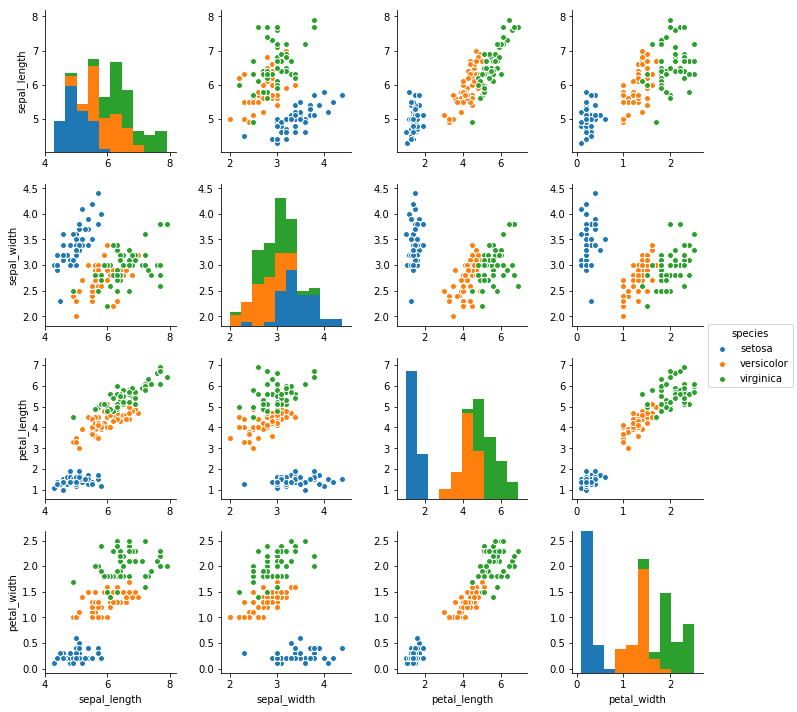

In [4]:
sns.pairplot(iris, hue='species')

In [15]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=0)

## Train a scikit-learn classifier


In [23]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

# Assess the classifier using accuracy

In [24]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 1.00


In [25]:
import pandas as pd

# One-Hot-Encoding

In [33]:
def one_hot_encode_object_array(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

In [34]:
# if you are a pandas man ...
def one_hot_encode_object_array_pandas(arr):
    return pd.get_dummies(arr).values

In [39]:
train_y_ohe = one_hot_encode_object_array_pandas(train_y)
test_y_ohe = one_hot_encode_object_array_pandas(test_y)

# Build the neural network model

In [40]:
model = Sequential()

## Hidden Layer

In [41]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

## Output Layer

In [44]:
model.add(Dense(3))
model.add(Activation('softmax'))

## Compile 

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# Use the neural network classifier

In [56]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=20, verbose=1, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 1s 8ms/step - loss: 0.0509 - acc: 0.9792 - val_loss: 0.0801 - val_acc: 0.9583
Epoch 2/100
96/96 [==============================] - 0s 157us/step - loss: 0.0449 - acc: 0.9792 - val_loss: 0.0939 - val_acc: 0.9583
Epoch 3/100
96/96 [==============================] - 0s 157us/step - loss: 0.0445 - acc: 0.9896 - val_loss: 0.1111 - val_acc: 0.9583
Epoch 4/100
96/96 [==============================] - 0s 167us/step - loss: 0.0444 - acc: 0.9896 - val_loss: 0.1210 - val_acc: 0.9167
Epoch 5/100
96/96 [==============================] - 0s 188us/step - loss: 0.0459 - acc: 0.9896 - val_loss: 0.1327 - val_acc: 0.8750
Epoch 6/100
96/96 [==============================] - 0s 167us/step - loss: 0.0454 - acc: 0.9896 - val_loss: 0.1223 - val_acc: 0.8750
Epoch 7/100
96/96 [==============================] - 0s 183us/step - loss: 0.0449 - acc: 0.9896 - val_loss: 0.1174 - val_acc: 0.9167
Epoch 8/100
96/96 [========

96/96 [==============================] - 0s 193us/step - loss: 0.0445 - acc: 0.9896 - val_loss: 0.1089 - val_acc: 0.9583
Epoch 62/100
96/96 [==============================] - 0s 172us/step - loss: 0.0446 - acc: 0.9896 - val_loss: 0.1065 - val_acc: 0.9583
Epoch 63/100
96/96 [==============================] - 0s 141us/step - loss: 0.0448 - acc: 0.9896 - val_loss: 0.1007 - val_acc: 0.9583
Epoch 64/100
96/96 [==============================] - 0s 146us/step - loss: 0.0442 - acc: 0.9896 - val_loss: 0.1063 - val_acc: 0.9583
Epoch 65/100
96/96 [==============================] - 0s 151us/step - loss: 0.0442 - acc: 0.9896 - val_loss: 0.1098 - val_acc: 0.9583
Epoch 66/100
96/96 [==============================] - 0s 162us/step - loss: 0.0446 - acc: 0.9896 - val_loss: 0.1121 - val_acc: 0.9583
Epoch 67/100
96/96 [==============================] - 0s 136us/step - loss: 0.0445 - acc: 0.9896 - val_loss: 0.1077 - val_acc: 0.9583
Epoch 68/100
96/96 [==============================] - 0s 151us/step - loss:

In [50]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print('Accuracy = {:.2f}'.format(accuracy))

Accuracy = 1.00


In [52]:
help(model.fit)

Help on method fit in module keras.models:

fit(x, y, batch_size=32, epochs=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, **kwargs) method of keras.models.Sequential instance
    Trains the model for a fixed number of epochs.
    
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        y: labels, as a Numpy array.
        batch_size: integer. Number of samples per gradient update.
        epochs: integer. Number of epochs to train the model.
            Note that in conjunction with initial_epoch, the parameter
            epochs is to be understood as "final epoch". The model is
            not trained for a number of steps given by epochs, but
            until the epoch epochs is reached.
        verbose: 0 for no logging to stdout,
            1 for progress bar logging, 2 for one log line per epoch.
     